In [2]:
import glob
import os
import pandas as pd
import json
import re
import tqdm
from matplotlib import pyplot as plt
import numpy as np
import shutil

In [3]:
#We gotta analyze 3 things:
#1) hbnet movement
#2) worst9mer
#3) lddt

In [4]:
movements = glob.glob("../05_assemble/210129_assemble_nmp_designs/*/*.json")

In [93]:
len(movements)

880

In [94]:
datas = []
for movement in movements:
    with open(movement,'r') as f:
        data = {}
        #print(movement)
        decoy = movement.split("/")[-1].split("_cst_data.json")[0]
        #print(decoy)
        data['decoy'] = decoy

        all_cst_data = json.load(f)
        befores = {",".join(k.split(",")[:2]) : all_cst_data[k] for k in all_cst_data.keys() if "before" in k}
        afters = {",".join(k.split(",")[:2]) : all_cst_data[k] for k in all_cst_data.keys() if "after" in k}

        data['before_total_score'] = sum([befores[k]['score'] for k in befores.keys()])
        data['after_total_score'] = sum([afters[k]['score'] for k in afters.keys()])
        data['delta_total_score'] = data['after_total_score'] - data['before_total_score']

        #THIS MAY NOT BE THE SAME SCORE
        data['before_max_score'] = max([befores[k]['score'] for k in befores.keys()])
        data['after_max_score'] = max([afters[k]['score'] for k in afters.keys()])
        data['delta_max_score'] = data['after_max_score'] - data['before_max_score']

        data['max_delta_score'] = max([afters[k]['score'] - befores[k]['score'] for k in befores.keys()])
        data['max_delta_dist'] = max([afters[k]['dist'] - befores[k]['dist'] for k in befores.keys()])

        data['before_total_dist'] = sum([befores[k]['dist'] for k in befores.keys()])
        data['after_total_dist'] = sum([afters[k]['dist'] for k in afters.keys()])
        data['delta_total_dist'] = data['after_total_dist'] - data['before_total_dist']

        datas.append(data)


In [95]:
df = pd.DataFrame(datas)
df

,decoy,before_total_score,after_total_score,delta_total_score,before_max_score,after_max_score,delta_max_score,max_delta_score,max_delta_dist,before_total_dist,after_total_dist,delta_total_dist
0,RC4_20_mini_nm_00152_1.6_31_0001_0018_hb_0002_...,0.000000,14.388092,14.388092,0.000000,7.987588,7.987588,7.987588,1.901375,11.157995,15.009035,3.851040
1,RC4_20_mini_nm_00247_1.6_31_0001_0051_hb_0001_...,0.433105,42.424901,41.991796,0.337271,20.184093,19.846821,20.184093,4.430462,11.793943,20.951630,9.157687
2,RC4_20_mini_nm_00073_1.6_31_0001_0018_hb_0004_...,0.158935,1.480086,1.321152,0.110978,1.068953,0.957975,1.056678,0.241632,14.938128,15.304167,0.366039
3,RC4_20_mini_nm_00164_1.6_31_0001_0050_hb_designed,0.439348,2.112788,1.673440,0.439347,1.248786,0.809439,0.809439,0.432614,11.498856,12.432214,0.933358
4,RC4_20_mini_nm_00141_1.6_31_0001_0048_hb_designed,0.146810,21.462417,21.315608,0.138320,11.386640,11.248320,11.248320,2.252945,8.610391,13.207913,4.597523
...,...,...,...,...,...,...,...,...,...,...,...,...
875,RC4_20_mini_nm_00245_1.6_31_0001_0044_hb_0001_...,0.253980,3.766594,3.512613,0.253980,1.988189,1.734209,1.988189,1.436724,13.236438,15.465956,2.229518
876,RC4_20_mini_nm_00179_1.6_31_0001_0024_hb_0002_...,0.903887,26.305257,25.401370,0.381906,13.075914,12.694008,12.694008,2.538802,14.970829,19.986177,5.015348
877,RC4_20_mini_nm_00127_1.6_31_0001_0035_hb_0009_...,1.583000,27.419211,25.836211,0.754413,11.068920,10.314507,10.538230,2.107646,20.807627,26.641715,5.834089
878,RC4_20_mini_nm_00019_1.6_31_0001_0037_hb_designed,0.000000,16.377985,16.377985,0.000000,9.476503,9.476503,9.476503,2.291728,11.662757,15.459634,3.796877


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf9682b0>]],
      dtype=object)

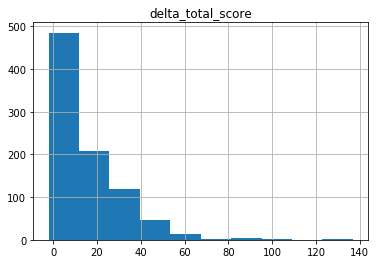

In [96]:
df.hist("delta_total_score")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf905978>]],
      dtype=object)

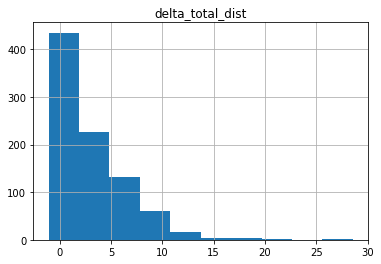

In [97]:
df.hist("delta_total_dist")

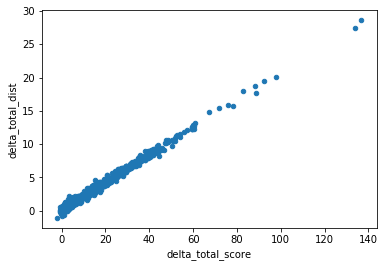

In [98]:
df.plot.scatter(x="delta_total_score",y="delta_total_dist")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf8324e0>]],
      dtype=object)

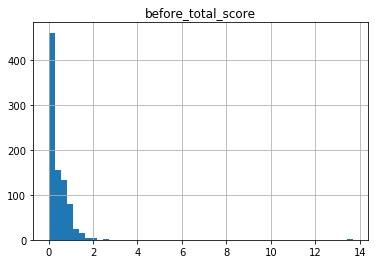

In [99]:
df.hist("before_total_score",bins=50)

In [100]:
df

,decoy,before_total_score,after_total_score,delta_total_score,before_max_score,after_max_score,delta_max_score,max_delta_score,max_delta_dist,before_total_dist,after_total_dist,delta_total_dist
0,RC4_20_mini_nm_00152_1.6_31_0001_0018_hb_0002_...,0.000000,14.388092,14.388092,0.000000,7.987588,7.987588,7.987588,1.901375,11.157995,15.009035,3.851040
1,RC4_20_mini_nm_00247_1.6_31_0001_0051_hb_0001_...,0.433105,42.424901,41.991796,0.337271,20.184093,19.846821,20.184093,4.430462,11.793943,20.951630,9.157687
2,RC4_20_mini_nm_00073_1.6_31_0001_0018_hb_0004_...,0.158935,1.480086,1.321152,0.110978,1.068953,0.957975,1.056678,0.241632,14.938128,15.304167,0.366039
3,RC4_20_mini_nm_00164_1.6_31_0001_0050_hb_designed,0.439348,2.112788,1.673440,0.439347,1.248786,0.809439,0.809439,0.432614,11.498856,12.432214,0.933358
4,RC4_20_mini_nm_00141_1.6_31_0001_0048_hb_designed,0.146810,21.462417,21.315608,0.138320,11.386640,11.248320,11.248320,2.252945,8.610391,13.207913,4.597523
...,...,...,...,...,...,...,...,...,...,...,...,...
875,RC4_20_mini_nm_00245_1.6_31_0001_0044_hb_0001_...,0.253980,3.766594,3.512613,0.253980,1.988189,1.734209,1.988189,1.436724,13.236438,15.465956,2.229518
876,RC4_20_mini_nm_00179_1.6_31_0001_0024_hb_0002_...,0.903887,26.305257,25.401370,0.381906,13.075914,12.694008,12.694008,2.538802,14.970829,19.986177,5.015348
877,RC4_20_mini_nm_00127_1.6_31_0001_0035_hb_0009_...,1.583000,27.419211,25.836211,0.754413,11.068920,10.314507,10.538230,2.107646,20.807627,26.641715,5.834089
878,RC4_20_mini_nm_00019_1.6_31_0001_0037_hb_designed,0.000000,16.377985,16.377985,0.000000,9.476503,9.476503,9.476503,2.291728,11.662757,15.459634,3.796877


In [101]:
#ok

In [102]:
pd.read_csv("02_worst9mer/worst9mer.csv")['decoy'][0]

'RC4_20_mini_nm_00050_1.6_31_0001_0054_hb_designed_relax_sym'

In [103]:
worst9mer_df = pd.read_csv("02_worst9mer/worst9mer.csv")
worst9mer_df['decoy'] = worst9mer_df['decoy'].str.split("_relax_sym").str[0]
worst9mer_df

,decoy,worst9mer
0,RC4_20_mini_nm_00050_1.6_31_0001_0054_hb_designed,0.378281
1,RC4_20_mini_nm_00121_1.6_31_0001_0040_hb_0005_...,0.418672
2,RC4_20_mini_nm_00024_1.6_31_0001_0054_hb_0001_...,0.380927
3,RC4_20_mini_nm_00249_1.6_31_0001_0010_hb_0010_...,0.457053
4,RC4_20_mini_nm_00149_1.6_31_0001_0043_hb_0003_...,0.471514
...,...,...
875,RC4_20_mini_nm_00249_1.6_31_0001_0007_hb_designed,0.367620
876,RC4_20_mini_nm_00155_1.6_31_0001_0001_hb_designed,0.353307
877,RC4_20_mini_nm_00102_1.6_31_0001_0029_hb_0001_...,0.352161
878,RC4_20_mini_nm_00216_1.6_31_0001_0037_hb_0004_...,0.395269


In [104]:
df = df.merge(worst9mer_df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf7db0f0>]],
      dtype=object)

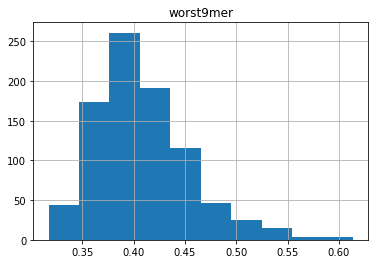

In [105]:
df.hist('worst9mer')

In [106]:
df.corr()['delta_total_score']

before_total_score    0.156210
after_total_score     0.999389
delta_total_score     1.000000
before_max_score      0.174835
after_max_score       0.923292
delta_max_score       0.923478
max_delta_score       0.924795
max_delta_dist        0.921146
before_total_dist     0.215935
after_total_dist      0.778107
delta_total_dist      0.995808
worst9mer             0.028210
Name: delta_total_score, dtype: float64

In [107]:
#great

In [108]:
lddt_data = []
for npz in tqdm.tqdm_notebook(glob.glob("01_dan/predictions/*.npz")):
    description = os.path.splitext(os.path.basename(npz))[0]
    data = {}
    x = np.load(npz)

    lddt = x["lddt"]           # per residue lddt

    num_subunits = 4

    monomer_len = len(lddt) // num_subunits

    #hard coded for trimer...
    stacked_lddt = np.vstack([lddt[:monomer_len],lddt[monomer_len:2*monomer_len],lddt[2*monomer_len:3*monomer_len],lddt[3*monomer_len:4*monomer_len]]).T
    
    mean_subunit_lddts = np.mean(stacked_lddt,axis=1)
    min_subunit_lddts = np.min(stacked_lddt,axis=1)
    max_subunit_lddts = np.max(stacked_lddt,axis=1)
    
    data['length'] = monomer_len
    data["global_mean_lddt"] = np.mean(mean_subunit_lddts)
    data["global_mean_pessimistic_lddt"] = np.mean(min_subunit_lddts)
    data["global_mean_optimistic_lddt"] = np.mean(max_subunit_lddts)
    data["num_lddt_sub90"] = np.sum(mean_subunit_lddts < 0.9)
    data["num_pessimistic_lddt_sub90"] = np.sum(min_subunit_lddts < 0.9)
    data["num_optimistic_lddt_sub90"] = np.sum(max_subunit_lddts < 0.9)
    data["description"] = description
    
    lddt_data.append(data)

lddt_df = pd.DataFrame(lddt_data)
lddt_df

/home/rdkibler/.conda/envs/pyro/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,length,global_mean_lddt,global_mean_pessimistic_lddt,global_mean_optimistic_lddt,num_lddt_sub90,num_pessimistic_lddt_sub90,num_optimistic_lddt_sub90,description
0,276,0.996582,0.994141,0.997559,0,0,0,RC4_20_mini_nm_00044_1.6_31_0001_0061_hb_desig...
1,276,0.987305,0.982910,0.989258,1,1,1,RC4_20_mini_nm_00067_1.6_31_0001_0008_hb_0001_...
2,276,0.997070,0.996094,0.997559,0,0,0,RC4_20_mini_nm_00136_1.6_31_0001_0048_hb_desig...
3,276,0.997070,0.994629,0.998047,0,0,0,RC4_20_mini_nm_00017_1.6_31_0001_0018_hb_0003_...
4,276,0.991699,0.988281,0.993164,0,0,0,RC4_20_mini_nm_00037_1.6_31_0001_0016_hb_0002_...
...,...,...,...,...,...,...,...,...
875,276,0.993652,0.990723,0.995117,0,1,0,RC4_20_mini_nm_00055_1.6_31_0001_0028_hb_desig...
876,276,0.996094,0.993652,0.997070,0,0,0,RC4_20_mini_nm_00079_1.6_31_0001_0046_hb_0001_...
877,276,0.993652,0.990723,0.995117,0,0,0,RC4_20_mini_nm_00030_1.6_31_0001_0031_hb_desig...
878,276,0.981934,0.978027,0.985352,2,3,0,RC4_20_mini_nm_00056_1.6_31_0001_0042_hb_0002_...


In [109]:
lddt_df['description'][0]

'RC4_20_mini_nm_00044_1.6_31_0001_0061_hb_designed_relax_sym'

In [110]:
lddt_df['decoy'] = lddt_df['description'].str.split("_relax_sym").str[0]

In [111]:
lddt_df = lddt_df.drop(columns=['description'])

In [112]:
df = df.merge(lddt_df)

In [113]:
df.corr()['delta_total_score']

before_total_score              0.156210
after_total_score               0.999389
delta_total_score               1.000000
before_max_score                0.174835
after_max_score                 0.923292
delta_max_score                 0.923478
max_delta_score                 0.924795
max_delta_dist                  0.921146
before_total_dist               0.215935
after_total_dist                0.778107
delta_total_dist                0.995808
worst9mer                       0.028210
length                               NaN
global_mean_lddt               -0.078864
global_mean_pessimistic_lddt   -0.084652
global_mean_optimistic_lddt    -0.077409
num_lddt_sub90                  0.026875
num_pessimistic_lddt_sub90      0.059182
num_optimistic_lddt_sub90       0.013644
Name: delta_total_score, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf7db2b0>]],
      dtype=object)

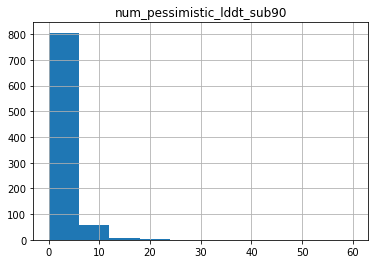

In [114]:
df.hist('num_pessimistic_lddt_sub90')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf792e48>]],
      dtype=object)

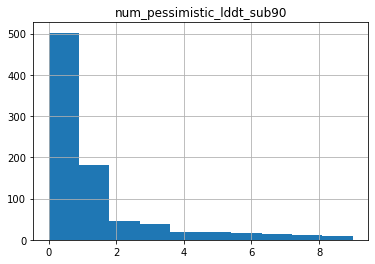

In [115]:
col = 'num_pessimistic_lddt_sub90'
df[df[col] < 10].hist(col)

In [116]:
#I suppose now we filter

In [117]:
len(df)

880

In [118]:
df = df[df['num_pessimistic_lddt_sub90'] == 0]
len(df)

502

In [119]:
df = df[df['num_pessimistic_lddt_sub90'] <= 0.6]
len(df)

502

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf3ff6d8>]],
      dtype=object)

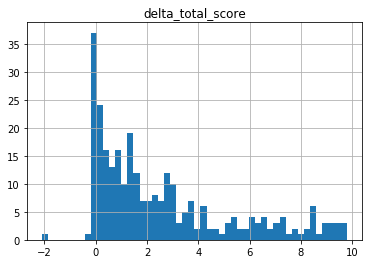

In [126]:
df[df['delta_total_score'] < 10].hist("delta_total_score",bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fffbf300b00>]],
      dtype=object)

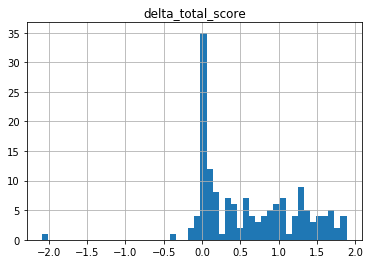

In [127]:
df[df['delta_total_score'] < 2].hist("delta_total_score",bins=50)

In [128]:
df = df[df['delta_total_score'] <= 0.5]
len(df)

79

In [130]:
df.decoy

47     RC4_20_mini_nm_00077_1.6_31_0001_0034_hb_designed
51     RC4_20_mini_nm_00146_1.6_31_0001_0042_hb_designed
54     RC4_20_mini_nm_00083_1.6_31_0001_0051_hb_designed
56     RC4_20_mini_nm_00137_1.6_31_0001_0057_hb_0010_...
65     RC4_20_mini_nm_00152_1.6_31_0001_0045_hb_0003_...
                             ...                        
863    RC4_20_mini_nm_00020_1.6_31_0001_0030_hb_0002_...
867    RC4_20_mini_nm_00035_1.6_31_0001_0054_hb_0002_...
870    RC4_20_mini_nm_00028_1.6_31_0001_0013_hb_designed
872    RC4_20_mini_nm_00206_1.6_31_0001_0036_hb_0002_...
879    RC4_20_mini_nm_00103_1.6_31_0001_0039_hb_0001_...
Name: decoy, Length: 79, dtype: object

In [132]:
paths = glob.glob("../05_assemble/210129_assemble_nmp_designs/*/*_relax_sym.pdb")

In [134]:
path_df = pd.DataFrame()
path_df['path'] = paths

In [138]:
path_df['decoy'] = path_df['path'].str.split("/").str[-1].str.split("_relax_sym.pdb").str[0]

In [140]:
df = df.merge(path_df)

In [153]:
df['review_id'] = [f"RC_4_20_nmp1_redesign_{idx+1:02d}" for idx in df.index]
df['review_id']

0     RC_4_20_nmp1_redesign_01
1     RC_4_20_nmp1_redesign_02
2     RC_4_20_nmp1_redesign_03
3     RC_4_20_nmp1_redesign_04
4     RC_4_20_nmp1_redesign_05
                ...           
74    RC_4_20_nmp1_redesign_75
75    RC_4_20_nmp1_redesign_76
76    RC_4_20_nmp1_redesign_77
77    RC_4_20_nmp1_redesign_78
78    RC_4_20_nmp1_redesign_79
Name: review_id, Length: 79, dtype: object

In [154]:
for idx,row in df.iterrows():
    print(f"cp {row.path} 03_passing_designs/{row.review_id}.pdb")

cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00077_1.6_31_0001_0034_hb_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_01.pdb
cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00146_1.6_31_0001_0042_hb_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_02.pdb
cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00083_1.6_31_0001_0051_hb_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_03.pdb
cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00137_1.6_31_0001_0057_hb_0010_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_04.pdb
cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00152_1.6_31_0001_0045_hb_0003_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_05.pdb
cp ../05_assemble/210129_assemble_nmp_designs/0/RC4_20_mini_nm_00074_1.6_31_0001_0012_hb_0002_designed_relax_sym.pdb 03_passing_designs/RC_4_20_nmp1_redesign_06.pdb
cp ../05_assemble/210129_

In [155]:
df.to_csv("filtered.csv.gz")